In [13]:
import pandas as pd
import talib
import matplotlib.pyplot as plt
import pynance as pn

In [7]:
# Load stock price dataset
stock_df = pd.read_csv('../../data/yfinance_data/AAPL_historical_data.csv')

# Convert date column to datetime
stock_df['Date'] = pd.to_datetime(stock_df['Date'], format='mixed', utc=True)

# Sort by date for consistency
stock_df.sort_values(by='Date', inplace=True)

# Check for missing values
print(stock_df.isnull().sum())
stock_df.dropna(inplace=True)  # Drop missing values if necessary

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [9]:
# Compute Simple Moving Average (SMA)
stock_df['SMA_20'] = talib.SMA(stock_df['Close'], timeperiod=20)

# Compute Exponential Moving Average (EMA)
stock_df['EMA_20'] = talib.EMA(stock_df['Close'], timeperiod=20)

# Compute Relative Strength Index (RSI)
stock_df['RSI'] = talib.RSI(stock_df['Close'], timeperiod=14)

# Compute Moving Average Convergence Divergence (MACD)
stock_df['MACD'], stock_df['MACD_signal'], stock_df['MACD_hist'] = talib.MACD(
    stock_df['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

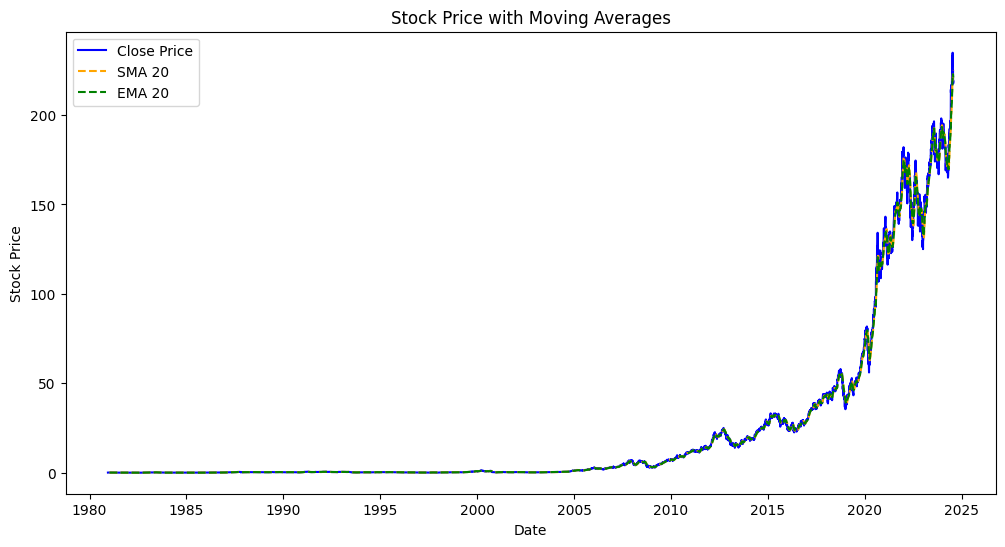

In [12]:
plt.figure(figsize=(12,6))
plt.plot(stock_df['Date'], stock_df['Close'], label='Close Price', color='blue')
plt.plot(stock_df['Date'], stock_df['SMA_20'], label='SMA 20', linestyle='dashed', color='orange')
plt.plot(stock_df['Date'], stock_df['EMA_20'], label='EMA 20', linestyle='dashed', color='green')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price with Moving Averages')
plt.legend()
plt.show()